In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

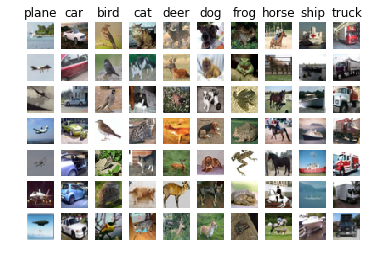

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
from keras.utils import np_utils

In [6]:
x_train = x_train/255 #彩色图片归一化
x_test = x_test/255  #彩色图片归一化
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam

In [8]:
model = Sequential() #空神经网络

In [9]:
model.add(Conv2D(64,(3,3),padding = 'same',input_shape=(32,32,3))) #filter 为3*3
model.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [19]:
model.fit(x_train,y_train,batch_size=64,epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
50000/50000 [==============================] - 162s 3ms/step - loss: 1.4621 - acc: 0.4687
Epoch 2/30
50000/50000 [==============================] - 141s 3ms/step - loss: 1.0412 - acc: 0.6313
Epoch 3/30
50000/50000 [==============================] - 147s 3ms/step - loss: 0.8777 - acc: 0.6920
Epoch 4/30
50000/50000 [==============================] - 166s 3ms/step - loss: 0.7632 - acc: 0.7305
Epoch 5/30
50000/50000 [==============================] - 174s 3ms/step - loss: 0.6789 - acc: 0.7625
Epoch 6/30
50000/50000 [==============================] - 172s 3ms/step - loss: 0.6070 - acc: 0.7873
Epoch 7/30
50000/50000 [==============================] - 168s 3ms/step - loss: 0.5383 - acc: 0.8097
Epoch 8/30
50000/50000 [==============================] - 189s 4ms/step - loss: 0.4827 - acc: 0.8301
Epoch 9/30
50000/50000 [==============================] - 163s 3ms/step - loss: 0.4314 - acc: 0.8480
Epoch 10/30
50000/50000 [==================

In [24]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 9s 915us/step


In [25]:
print('loss:',score[0])

loss: 1.123948661708832


In [26]:
print('acc:',score[1])

acc: 0.7641


In [23]:
model_json = model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('CIFAR10_model_weights_cnn2.h5')